In [ ]:
import pandas as pd
import numpy as np

# Loading predective test dataset
file_path = "C:/Users/Anagha/IML_FinalProject/Test_Data_Prediction.xlsx"  
df = pd.read_excel(file_path)

# Converting 'published_at' column to datetime (with timezone-awareness)
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce', utc=True)

# Defining the comparison date (June 15, 2019) and make it timezone-aware
june_15_date = pd.to_datetime('2019-06-15', utc=True)

# Filter comments based on expected date
before_june_15 = df[df['published_at'] <= june_15_date]
after_june_15 = df[df['published_at'] > june_15_date]

# Counting the number of each label in both groups
def count_labels(df):
    label_counts = df['predicted_label'].value_counts().to_dict()
    return label_counts

# Counting the labels for both date groups
before_june_15_label_counts = count_labels(before_june_15)
after_june_15_label_counts = count_labels(after_june_15)

# Counting the number of each label in both groups
def count_labels(df):
    label_counts = df['predicted_label'].value_counts().to_dict()
    
    # Mapping string labels to text labels
    label_mapping = {
        "LABEL_0": "Supportive",
        "LABEL_1": "Neutral",
        "LABEL_2": "Critical of the Brand",
        "LABEL_3": "Critical of the Message",
        "LABEL_4": "Irrelevant"
    }
    
    # Applying the mapping to the label counts
    mapped_counts = {label_mapping[label]: count for label, count in label_counts.items()}
    
    return mapped_counts

# Counting the labels for both date groups
before_june_15_label_counts = count_labels(before_june_15)
after_june_15_label_counts = count_labels(after_june_15)

print("Label counts for comments before and on June 15, 2019:")
for label, count in before_june_15_label_counts.items():
    print(f"{label}: {count}")

print("\nLabel counts for comments after June 15, 2019:")
for label, count in after_june_15_label_counts.items():
    print(f"{label}: {count}")

Label counts for comments before and on June 15, 2019:
Critical of the Brand: 5029
Supportive: 3368
Irrelevant: 1185
Critical of the Message: 617

Label counts for comments after June 15, 2019:
Critical of the Brand: 1166
Supportive: 501
Irrelevant: 266
Critical of the Message: 105


C:\Users\Anagha\AppData\Local\Temp\ipykernel_29900\3057622700.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_counts = df.groupby(['time_period', 'predicted_label']).size().unstack(fill_value=0)


Sentiment Percentage over Time:
predicted_label    LABEL_0   LABEL_1    LABEL_2   LABEL_3    LABEL_4
time_period                                                         
Jan-Jun 2019     19.639279  0.000000  67.935872  0.801603  11.623246
Jul-Dec 2019      7.228916  0.000000  83.132530  0.000000   9.638554
Jan-Jun 2020     12.643678  0.000000  56.321839  2.298851  28.735632
Jul-Dec 2020     14.473684  0.000000  63.157895  1.315789  21.052632
Jan-Jun 2021     16.216216  0.000000  70.270270  0.000000  13.513514
Jul-Dec 2021      8.000000  0.000000  82.000000  0.000000  10.000000
Jan-Jun 2022     10.855263  0.000000  77.960526  0.000000  11.184211
Jul-Dec 2022     10.309278  0.000000  75.257732  0.687285  13.745704
Jan-Jun 2023      9.866667  0.000000  76.533333  0.533333  13.066667
Jul-Dec 2023     16.521739  0.434783  63.913043  0.434783  18.695652
Jan-Jun 2024     14.545455  0.000000  65.454545  1.212121  18.787879


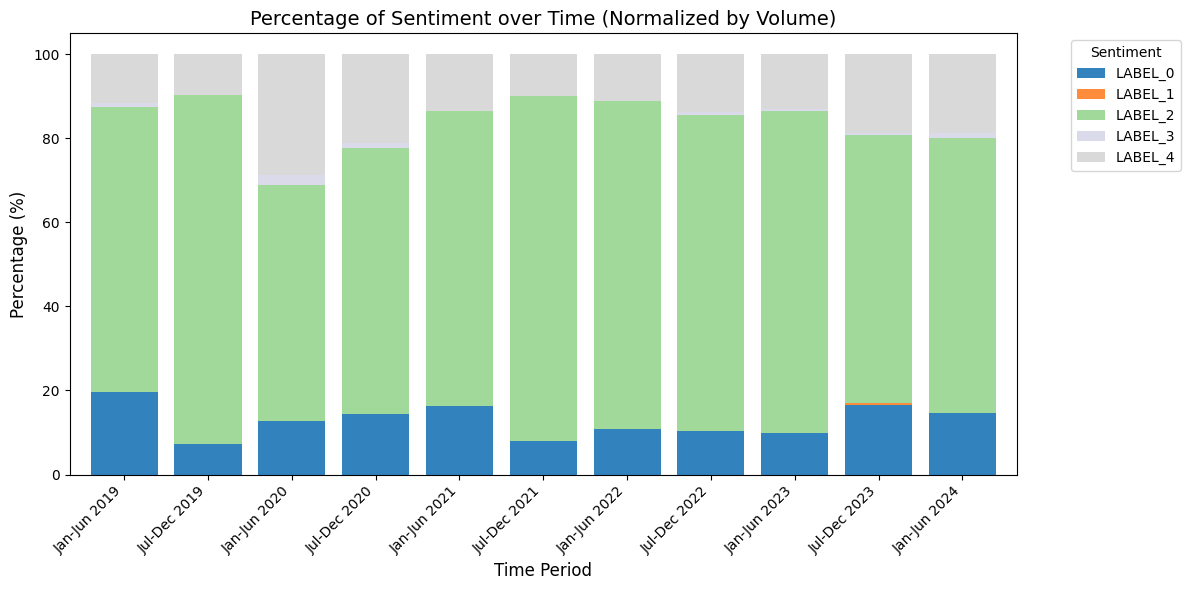

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "C:/Users/Anagha/Desktop/Predicted_Test_Data2.xlsx"  
df = pd.read_excel(file_path)

df['published_at'] = pd.to_datetime(df['published_at'])

# Define 6-month bins
df['time_period'] = pd.cut(
    df['published_at'],
    pd.date_range(start="2019-01-01", end="2025-01-01", freq='6M'),
    labels=[
        "Jan-Jun 2019", "Jul-Dec 2019", "Jan-Jun 2020", "Jul-Dec 2020", 
        "Jan-Jun 2021", "Jul-Dec 2021", "Jan-Jun 2022", "Jul-Dec 2022",
        "Jan-Jun 2023", "Jul-Dec 2023", "Jan-Jun 2024"
    ],
    include_lowest=True
)

# Group by time period and sentiment, then normalize
sentiment_counts = df.groupby(['time_period', 'predicted_label']).size().unstack(fill_value=0)
sentiment_percentage = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

print("Sentiment Percentage over Time:")
print(sentiment_percentage)

# Plotting
ax = sentiment_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c', width=0.8)
plt.title("Percentage of Sentiment over Time (Normalized by Volume)", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xlabel("Time Period", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


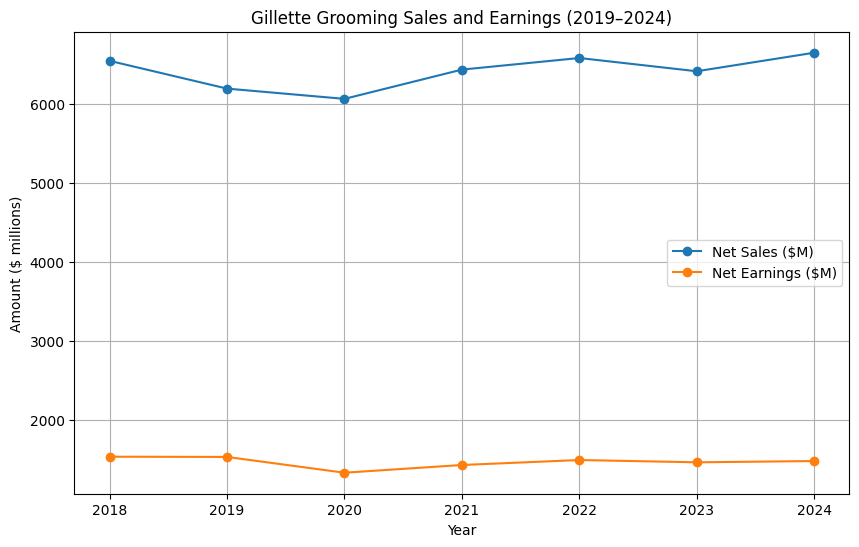

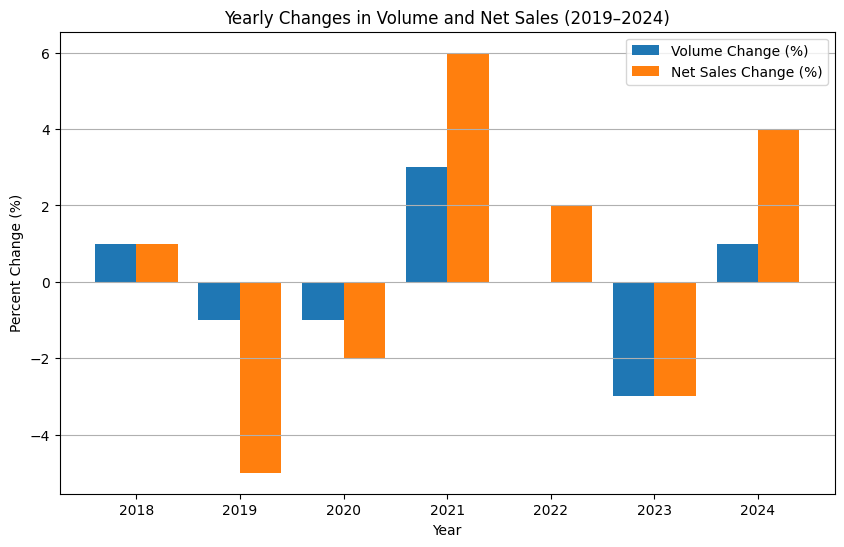

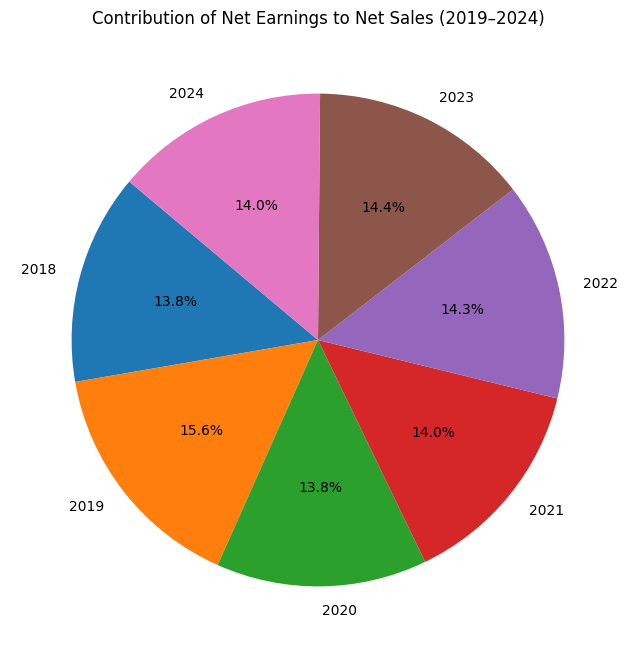

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    "Year": [2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "Net Sales ($M)": [6551, 6199, 6069, 6440, 6587, 6419, 6654],
    "Net Earnings ($M)": [1532, 1529, 1329, 1427, 1490, 1461, 1477],
    "Volume Change (%)": [1, -1, -1, 3, 0, -3, 1],
    "Net Sales Change (%)": [1, -5, -2, 6, 2, -3, 4],
    "Earnings Change (%)": [7, 7, -13, 7, 4, -2, 1],
    "% of Net Sales": [21.9, 24.7, 21.9, 22.2, 22.6, 22.8, 22.2],
}

df = pd.DataFrame(data)

# Plot 1: Net Sales and Earnings
plt.figure(figsize=(10, 6))
plt.plot(df["Year"], df["Net Sales ($M)"], marker="o", label="Net Sales ($M)")
plt.plot(df["Year"], df["Net Earnings ($M)"], marker="o", label="Net Earnings ($M)")
plt.title("Gillette Grooming Sales and Earnings (2019–2024)")
plt.xlabel("Year")
plt.ylabel("Amount ($ millions)")
plt.legend()
plt.grid()
plt.show()

# Plot 2: Changes in Volume and Net Sales
plt.figure(figsize=(10, 6))
plt.bar(df["Year"] - 0.2, df["Volume Change (%)"], width=0.4, label="Volume Change (%)")
plt.bar(df["Year"] + 0.2, df["Net Sales Change (%)"], width=0.4, label="Net Sales Change (%)")
plt.title("Yearly Changes in Volume and Net Sales (2019–2024)")
plt.xlabel("Year")
plt.ylabel("Percent Change (%)")
plt.legend()
plt.grid(axis="y")
plt.show()

# Plot 3: % of Net Sales Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(df["% of Net Sales"], labels=df["Year"], autopct="%1.1f%%", startangle=140)
plt.title("Contribution of Net Earnings to Net Sales (2019–2024)")
plt.show()
